# Part A: Logistic Regression

## Learning task 1

1. Build  a  classification  model  `(LR1)`  using  Logistic  Regression.  
2. What  happens  to  testing accuracy when you vary the  decision  probability threshold  from  0.5 to 0.3, 0.4,  0.6 and  0.7.

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("..")
from preprocessor import Preprocessor
from Models.LogisticRegression import LogReg
import warnings 
import matplotlib.pyplot as plt
warnings.filterwarnings(action="ignore")

In [2]:
# Variables (hyperparamters) as defined in question

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
learning_rates = [1e-2, 1e-3, 1e-4]
descents = ["batch", "mini-batch", "stochastic"]

# Creating a parameter grid

grid = {}
for threshold in thresholds:
    for learning_rate in learning_rates:
        for descent in descents:
            grid[(threshold, learning_rate, descent)]: tuple[float, float] = tuple()

# creating a dataframe to store the results

results = pd.DataFrame(columns=["threshold", "learning_rate", "descent", "mean_accuracy", "std_accuracy"])

In [3]:
dataset = pd.read_csv("../dataset.csv")
dataset.drop(columns = ["id"], inplace=True)

In [4]:
preprocessor_1 = Preprocessor(dataset, "diagnosis")
splits = preprocessor_1.preprocess(drop_na=True, standardize=False, labels=[0, 1], n_splits=1)

{0: 'B', 1: 'M'}


In [5]:
def create_plot(train_losses, test_losses, title):
    plt.figure()
    plt.suptitle("Losses")
    plt.plot(train_losses[::20], label="Train")
    plt.plot(test_losses[::20], label="Test")
    plt.xlabel("Epochs * 20")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.show()
    

Learning Task1: No Feature Engineering


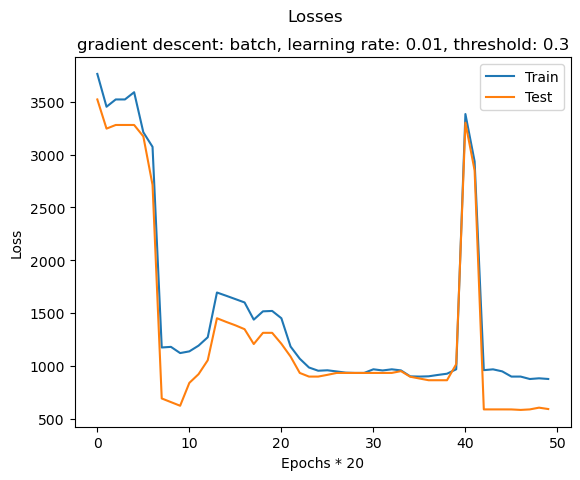

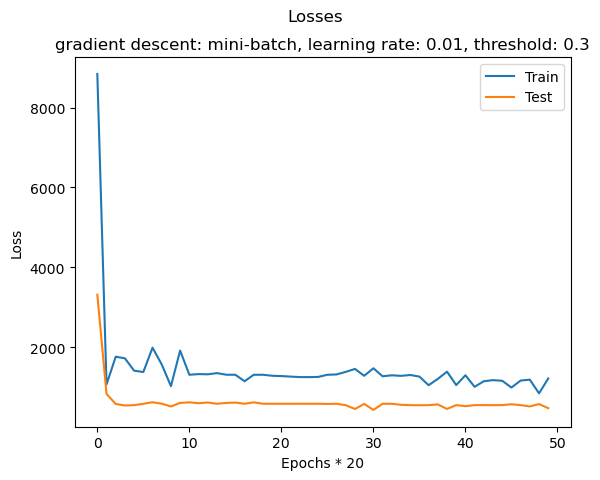

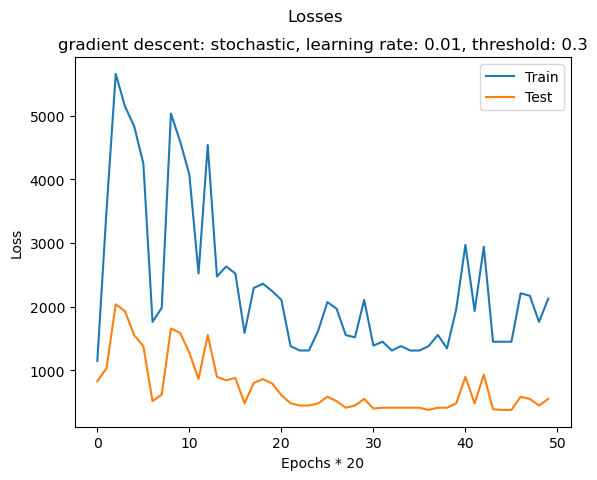

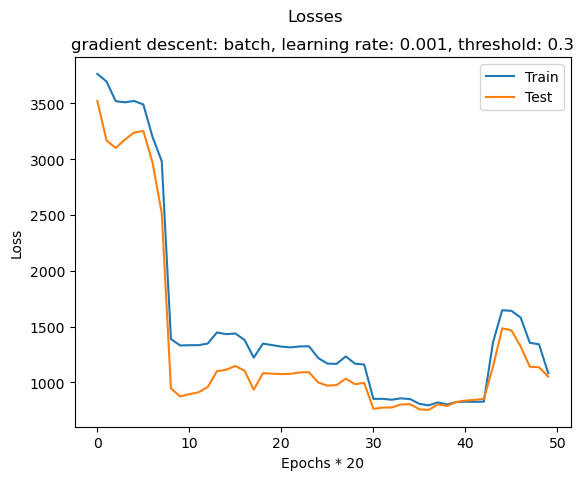

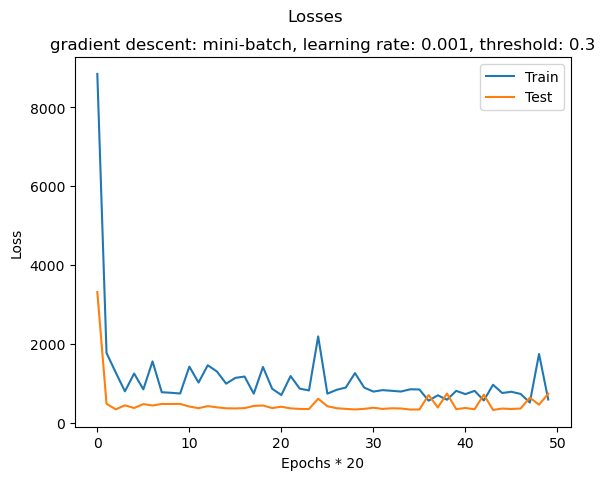

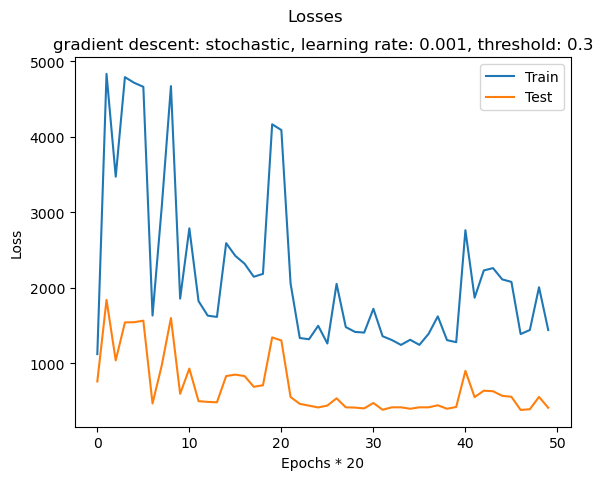

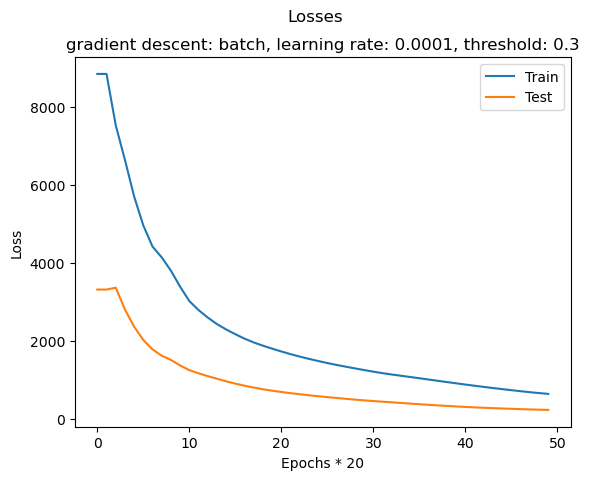

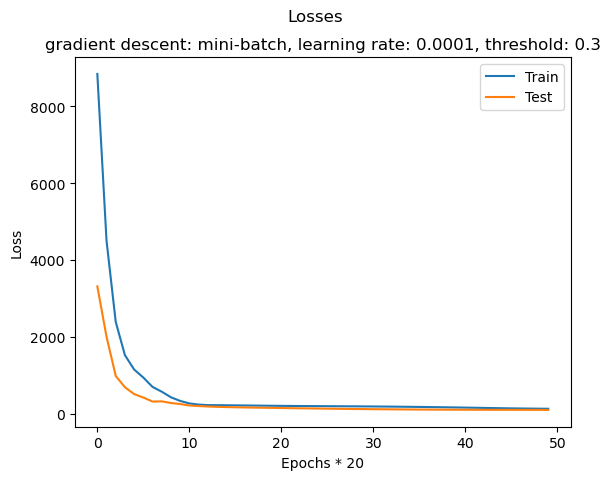

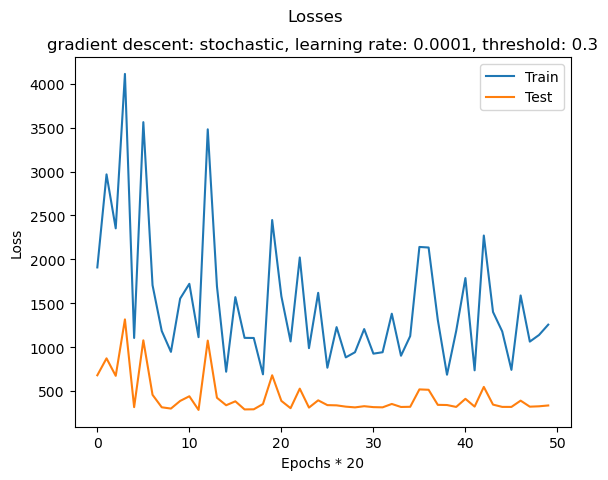

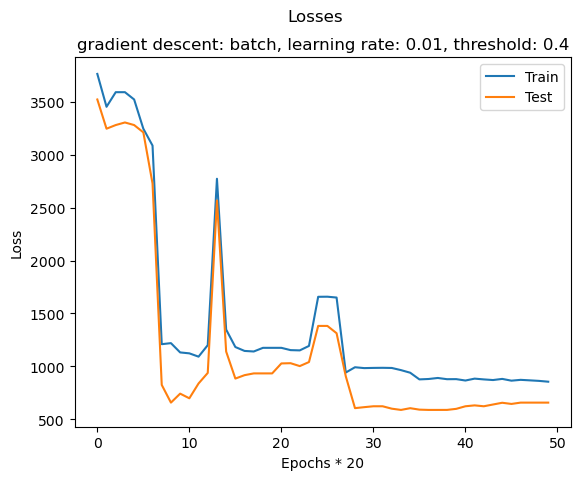

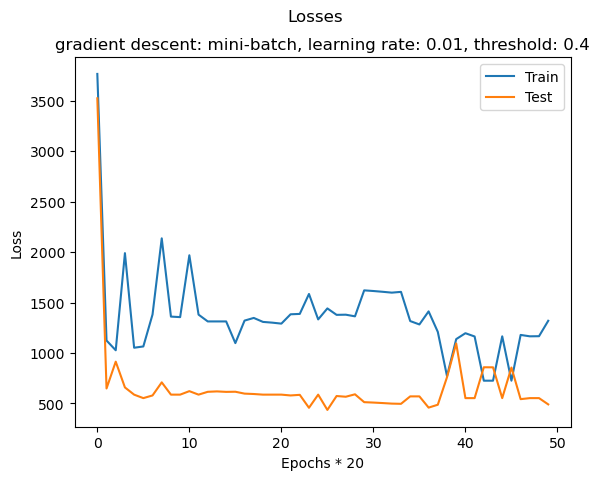

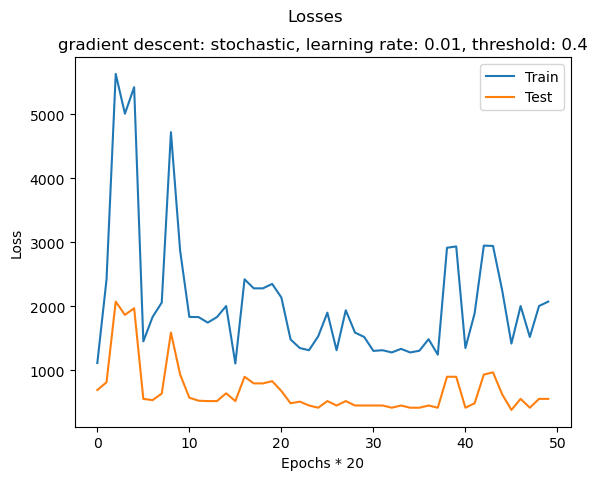

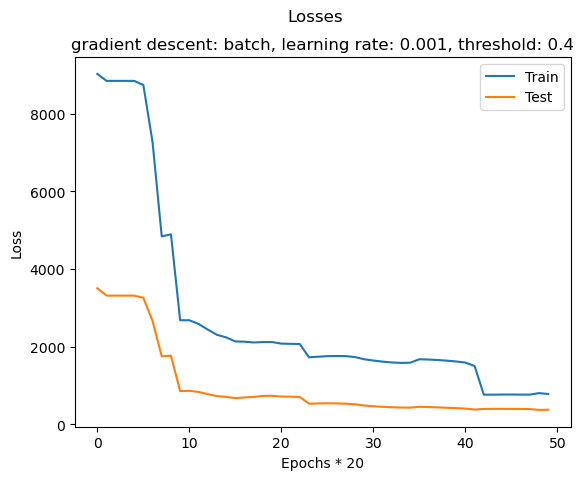

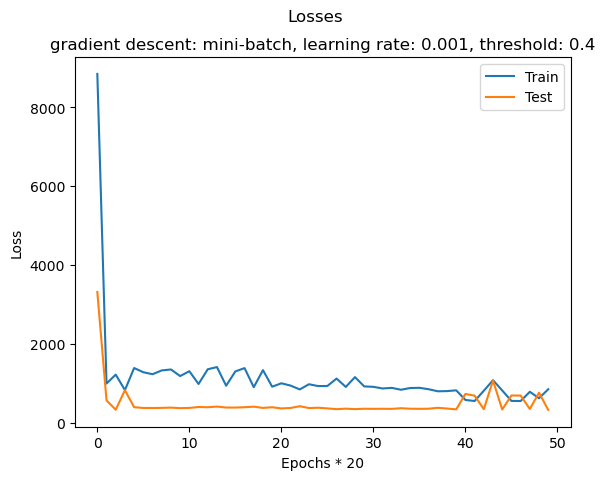

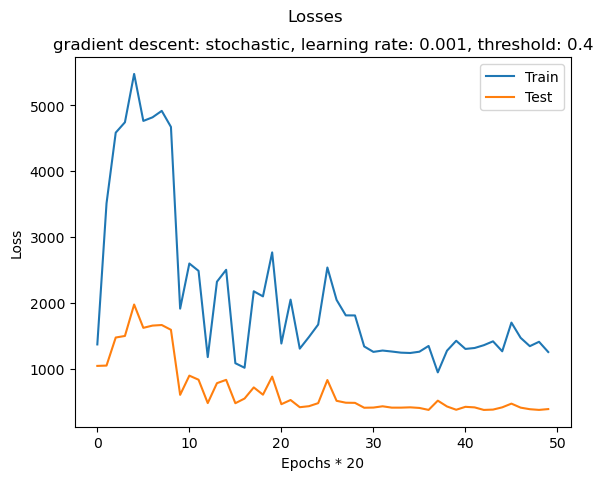

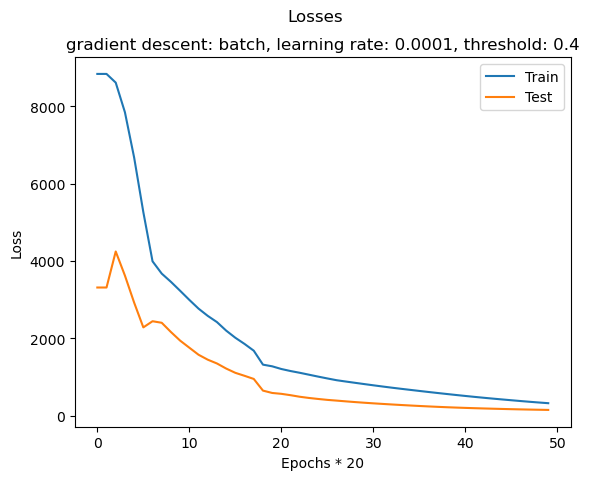

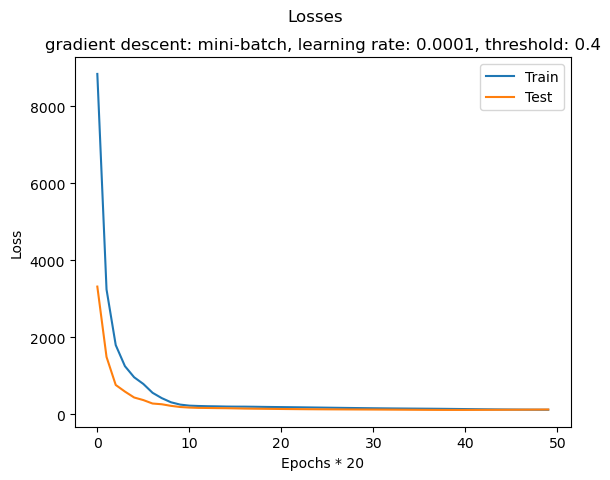

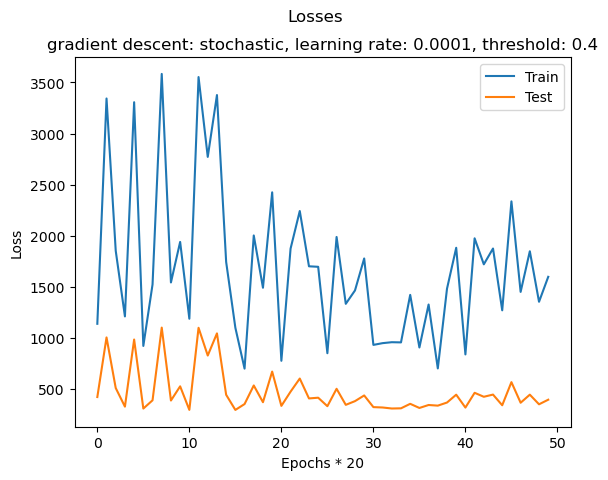

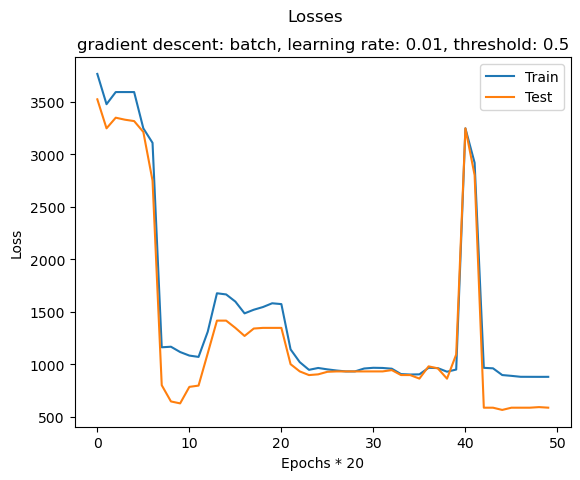

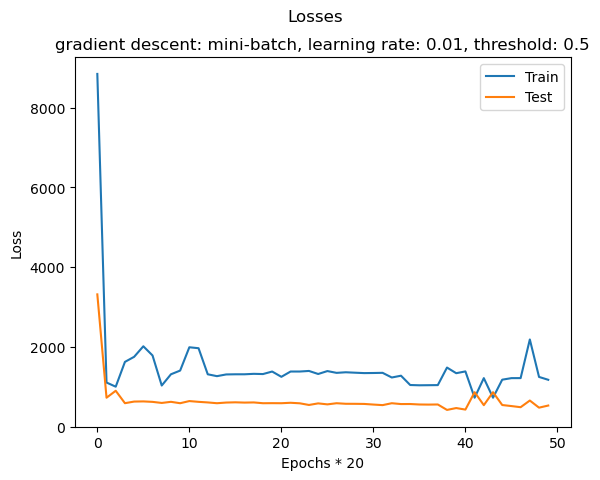

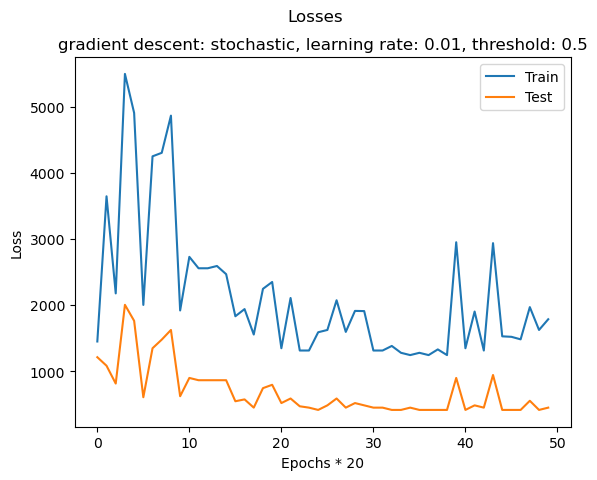

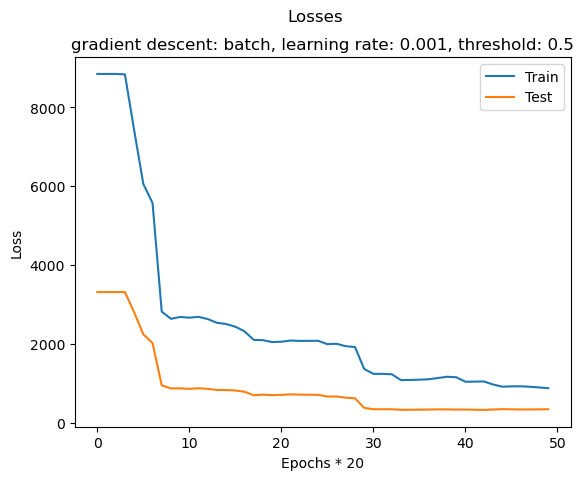

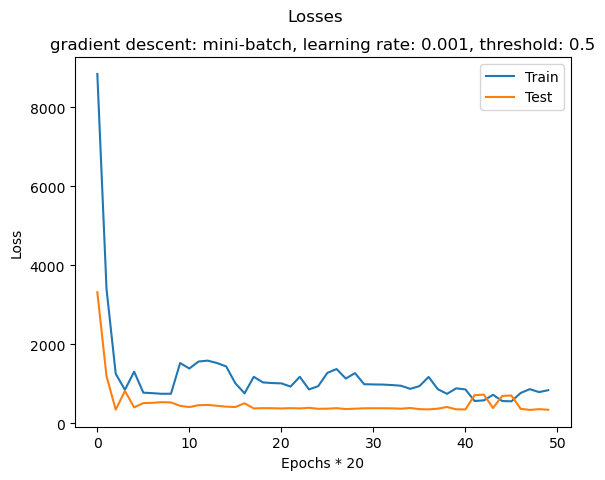

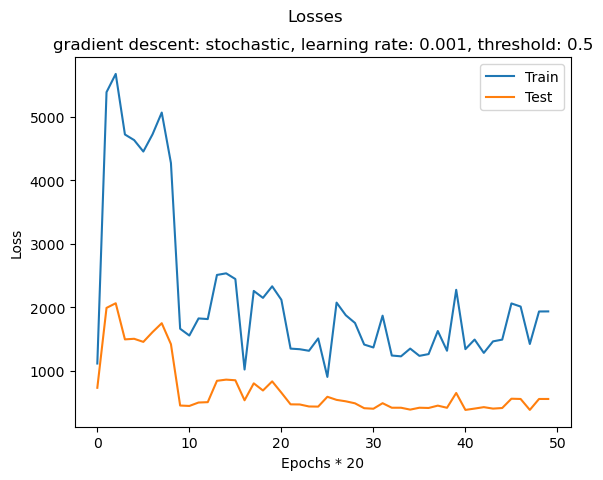

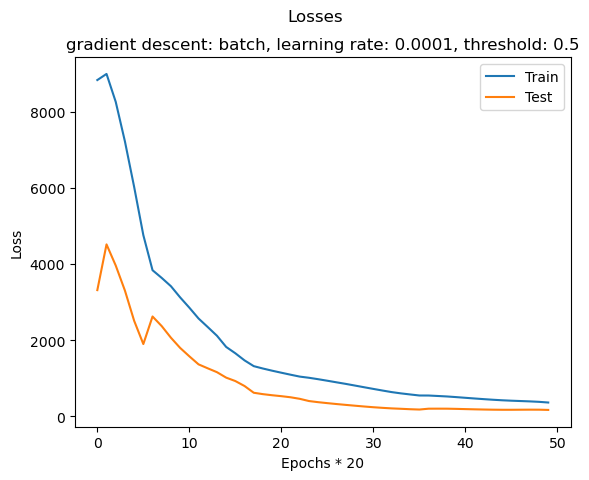

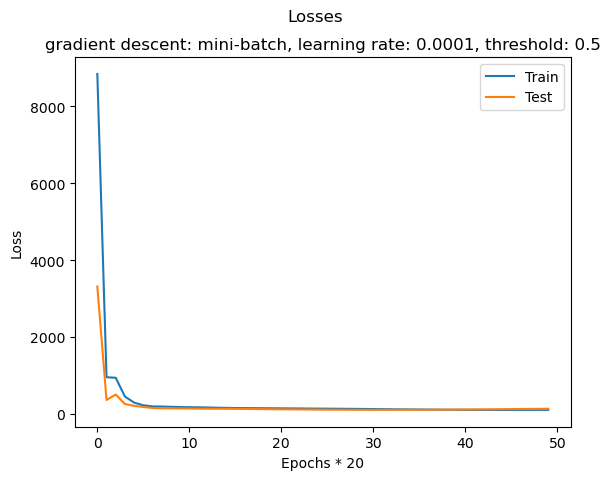

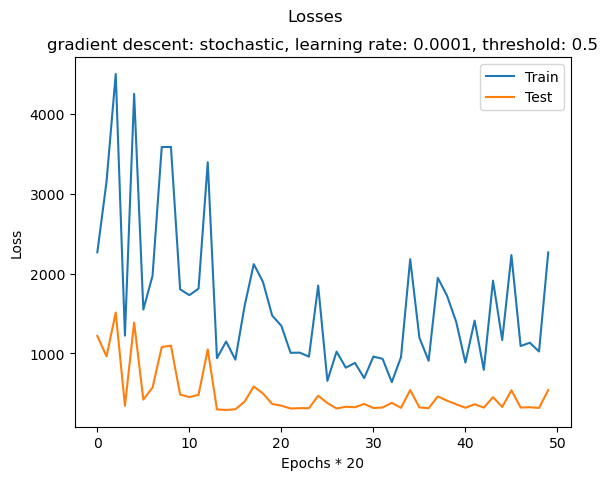

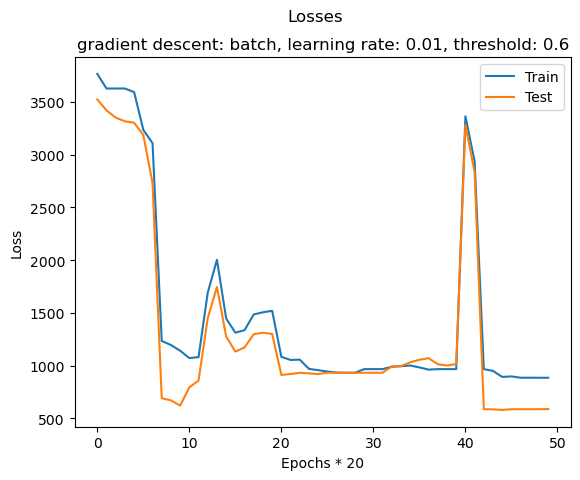

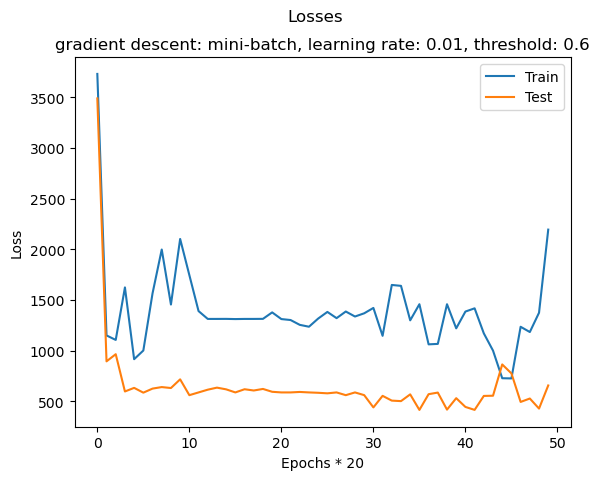

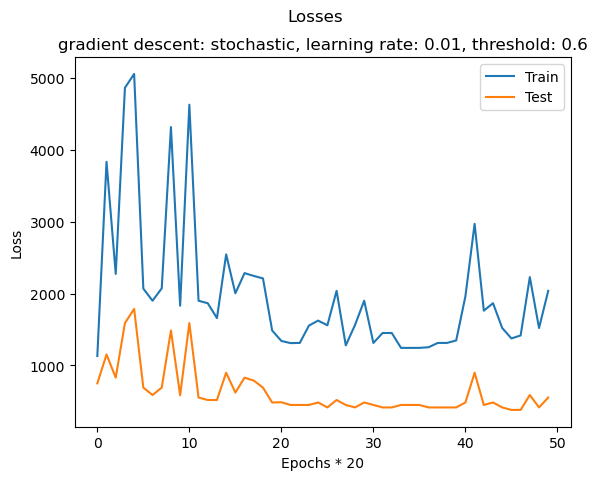

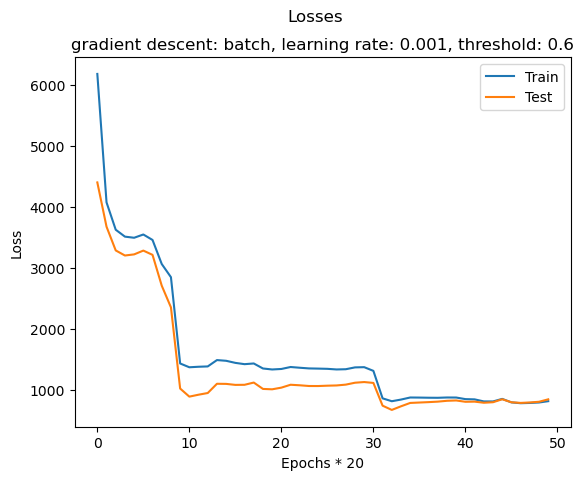

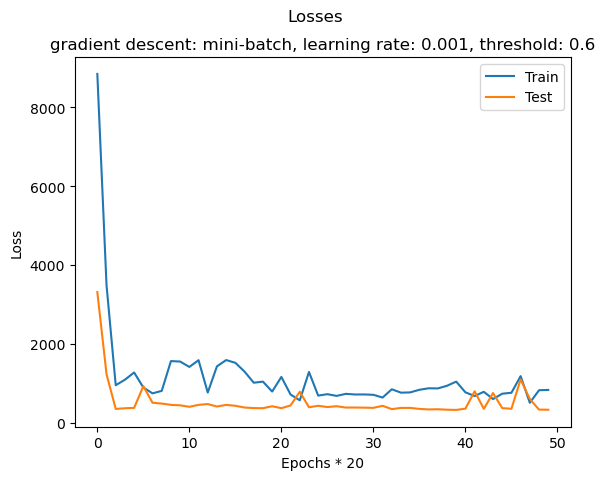

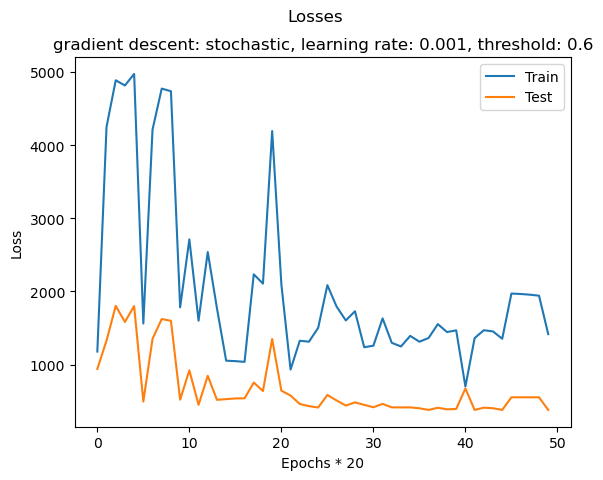

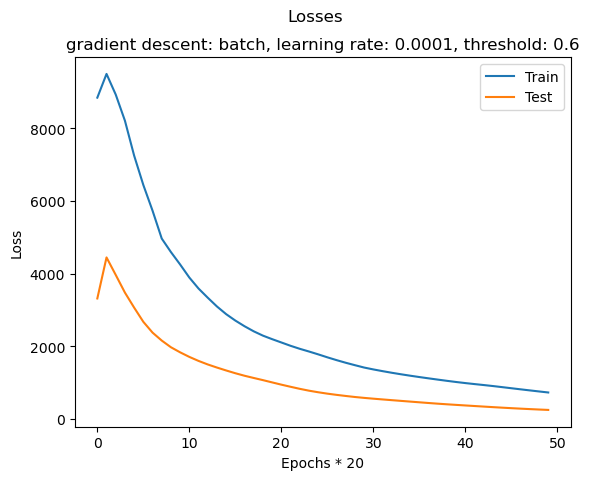

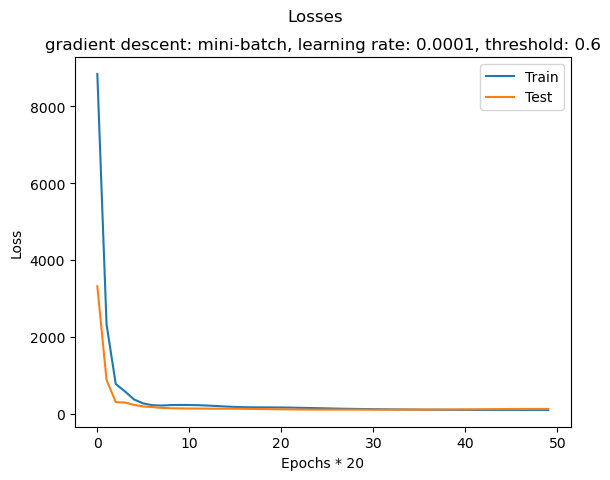

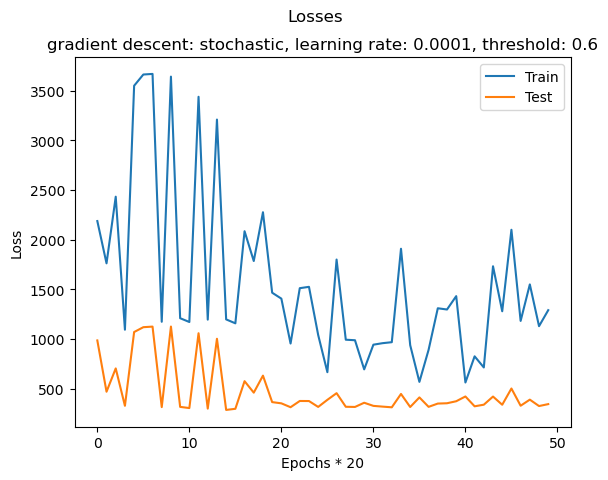

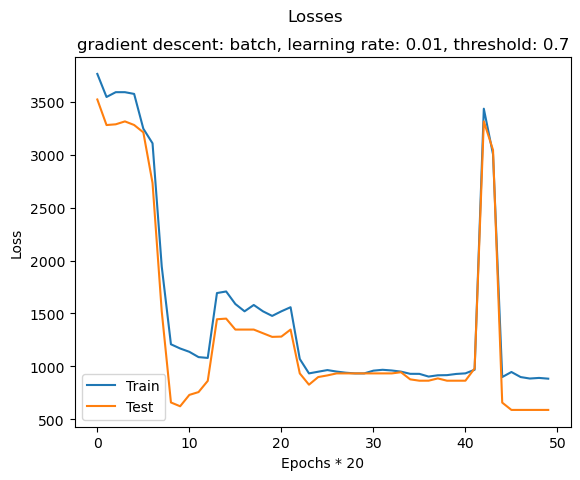

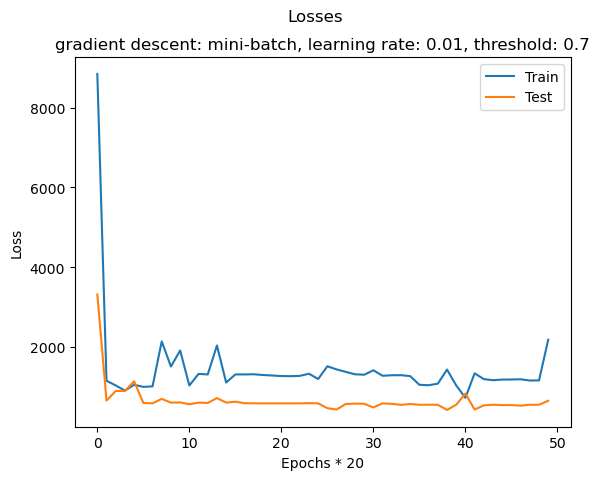

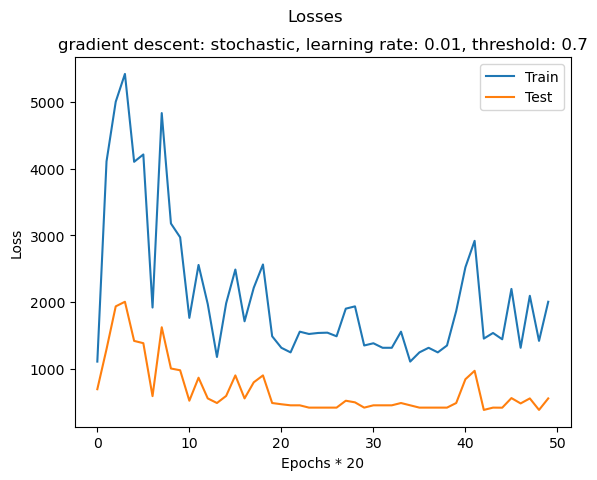

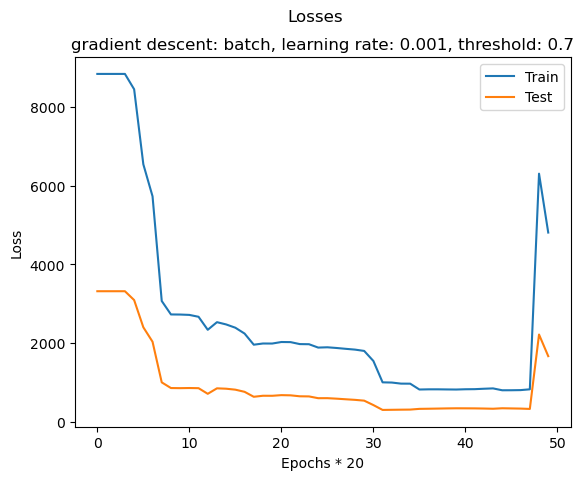

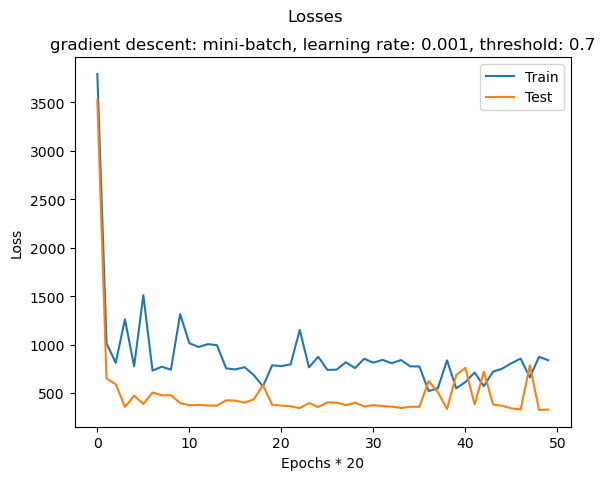

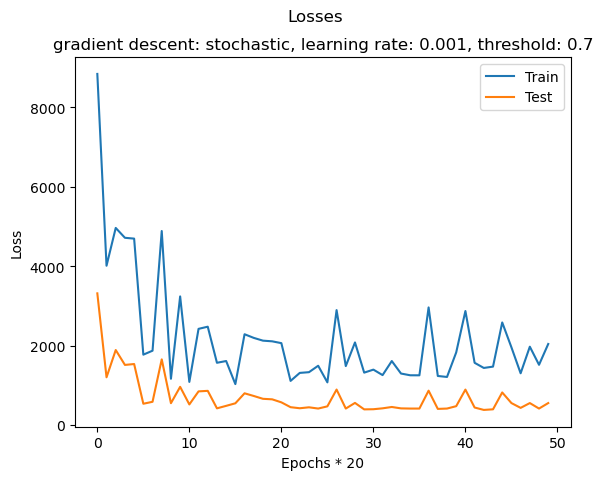

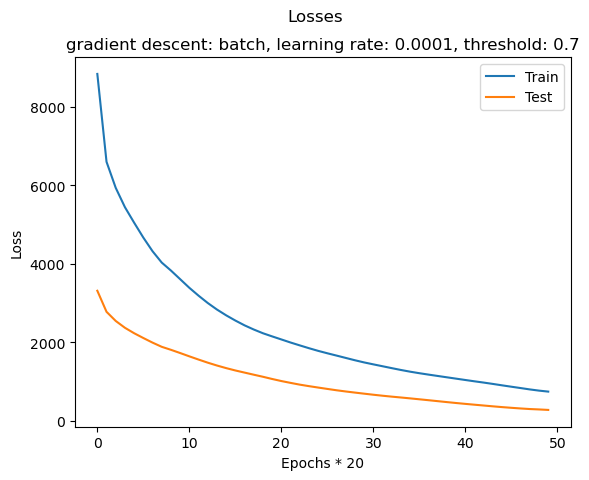

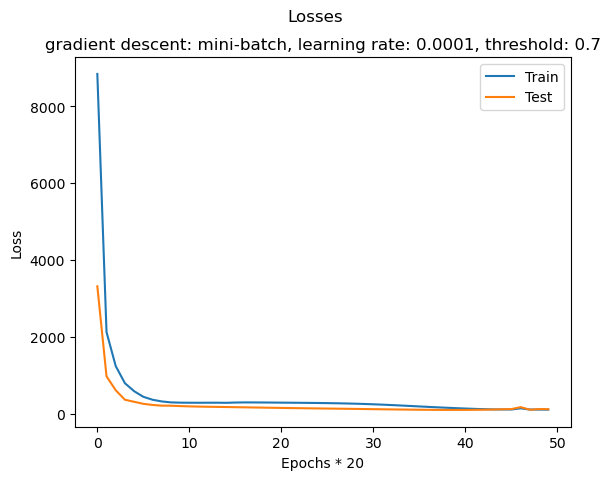

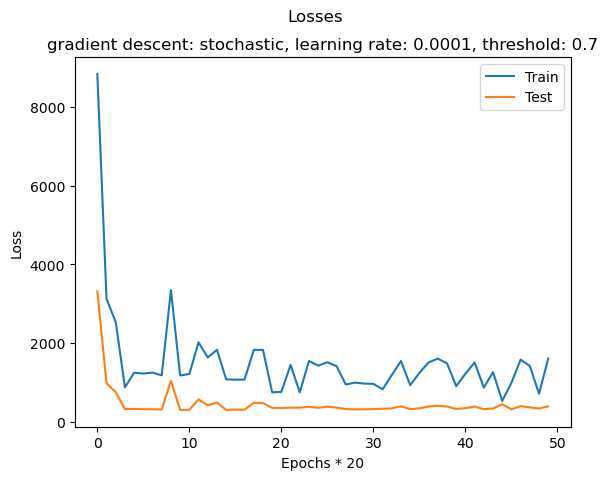

In [6]:
results_lr1 = results.copy()
print("Learning Task1: No Feature Engineering")
for key in grid.keys():
    threshold, learning_rate, descent = key
    accuracies: list[float] = []
    for split in splits:

        train, test = split
        X_train, y_train = train.drop(columns=["diagnosis"]).to_numpy(dtype=np.float64), train["diagnosis"].to_numpy(dtype=np.float64)
        X_test, y_test = test.drop(columns=["diagnosis"]).to_numpy(dtype=np.float64), test["diagnosis"].to_numpy(dtype=np.float64)
        logreg_1 = LogReg(threshold=threshold)
        train_losses, test_losses = logreg_1.fit(X_train, y_train, X_test, y_test, lr = learning_rate, descent=descent, epochs=1000)
        
        y_pred = logreg_1.predict(X_test)
        tp, tn, fp, fn = logreg_1.score(X_test, y_test)
        accuracies.append((tp + tn) / (tp + tn + fp + fn))
    result_dict = {
        "threshold": threshold,
        "learning_rate": learning_rate,
        "descent": descent,
        "mean_accuracy": np.round((np.mean(accuracies)*100), 2),
        "std_accuracy": np.round((np.std(accuracies)*100), 2)
    }
    create_plot(train_losses, test_losses, f"gradient descent: {descent}, learning rate: {learning_rate}, threshold: {threshold}")
    result =  pd.DataFrame(result_dict, index=[0])
    results_lr1 = pd.concat([results_lr1, result], ignore_index=True)

In [7]:
results_lr1.sort_values(by=["mean_accuracy"], ascending=False, inplace=True)
results_lr1

threshold  learning_rate     descent  mean_accuracy  std_accuracy
14        0.4         0.0010  stochastic          94.44           0.0
44        0.7         0.0001  stochastic          93.94           0.0
32        0.6         0.0010  stochastic          93.94           0.0
2         0.3         0.0100  stochastic          93.94           0.0
29        0.6         0.0100  stochastic          93.94           0.0
23        0.5         0.0010  stochastic          93.43           0.0
5         0.3         0.0010  stochastic          92.93           0.0
7         0.3         0.0001  mini-batch          92.42           0.0
13        0.4         0.0010  mini-batch          92.42           0.0
19        0.5         0.0100  mini-batch          91.92           0.0
26        0.5         0.0001  stochastic          91.92           0.0
30        0.6         0.0010       batch          91.92           0.0
20        0.5         0.0100  stochastic          91.92           0.0
11        0.4         0.0100  stochastic          91.92           0.0
37        0.7         0.0100  mini-batch          91.92           0.0
38        0.7         0.0100  stochastic          91.92           0.0
4         0.3         0.0010  mini-batch          91.92           0.0
39        0.7         0.0010       batch          91.41           0.0
36        0.7         0.0100       batch          90.91           0.0
27        0.6         0.0100       batch          90.91           0.0
35        0.6         0.0001  stochastic          90.91           0.0
0         0.3         0.0100       batch          90.91           0.0
18        0.5         0.0100       batch          90.91           0.0
3         0.3         0.0010       batch          90.91           0.0
9         0.4         0.0100       batch          90.40           0.0
8         0.3         0.0001  stochastic          90.40           0.0
31        0.6         0.0010  mini-batch          89.90           0.0
16        0.4         0.0001  mini-batch          89.39           0.0
28        0.6         0.0100  mini-batch          88.89           0.0
24        0.5         0.0001       batch          88.38           0.0
25        0.5         0.0001  mini-batch          88.38           0.0
17        0.4         0.0001  stochastic          87.88           0.0
15        0.4         0.0001       batch          87.88           0.0
43        0.7         0.0001  mini-batch          87.88           0.0
34        0.6         0.0001  mini-batch          87.88           0.0
1         0.3         0.0100  mini-batch          87.37           0.0
22        0.5         0.0010  mini-batch          87.37           0.0
10        0.4         0.0100  mini-batch          87.37           0.0
12        0.4         0.0010       batch          87.37           0.0
40        0.7         0.0010  mini-batch          86.87           0.0
41        0.7         0.0010  stochastic          86.87           0.0
33        0.6         0.0001       batch          86.36           0.0
6         0.3         0.0001       batch          85.35           0.0
21        0.5         0.0010       batch          85.35           0.0
42        0.7         0.0001       batch          85.35           0.0

## Learning task 2

1. Perform:
    1. Feature engineering task 1: imputing missing values
    2. Feature engineering task 2: normalization/stanardization

2. Build a  classification  model  `(LR2)`  using  Logistic  Regression.

3. What  happens  to  testing accuracy when you vary the  decision  probability threshold  from  0.5 to 0.3, 0.4,  0.6 and  0.7.

In [8]:
preprocessor_2 = Preprocessor(dataset, "diagnosis")
splits = preprocessor_2.preprocess(drop_na=False, standardize=True, labels=[0, 1], n_splits=1)

{0: 'B', 1: 'M'}


Learning Task2: Feature Engineering


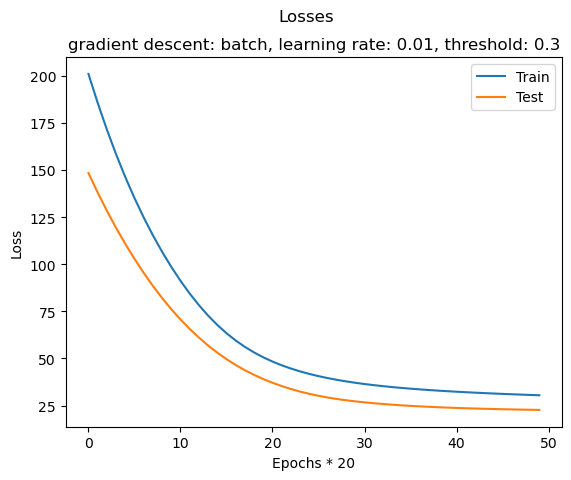

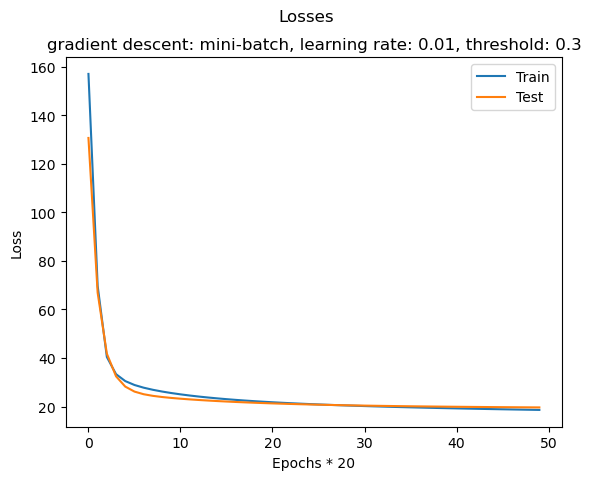

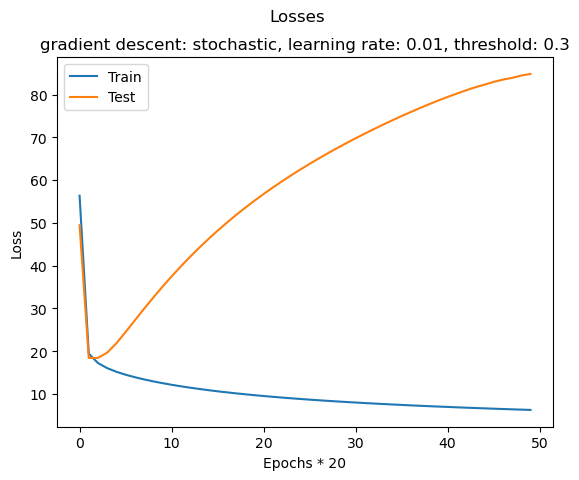

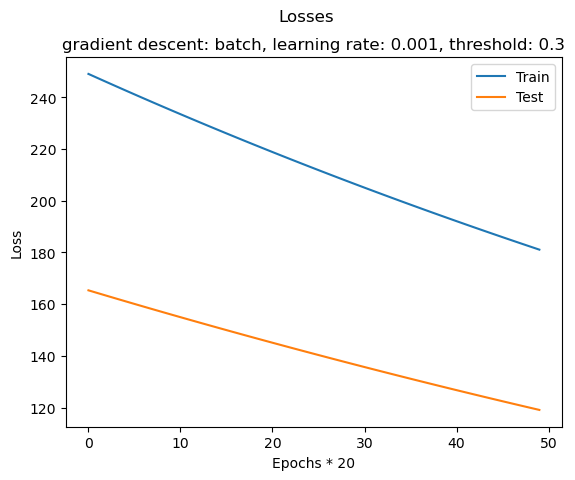

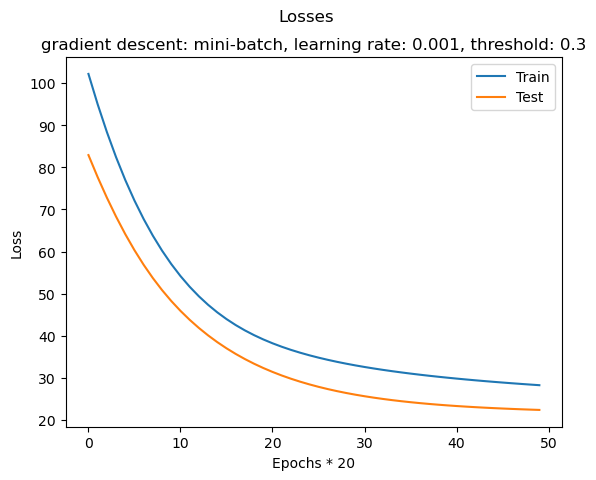

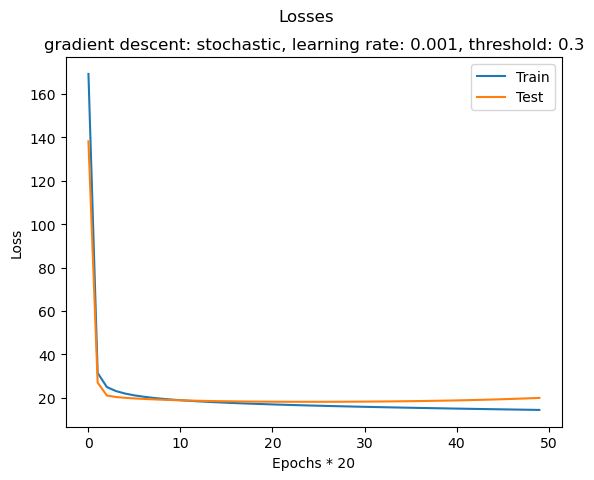

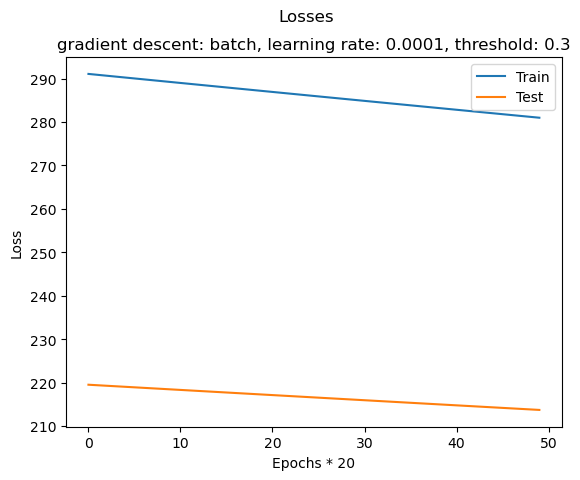

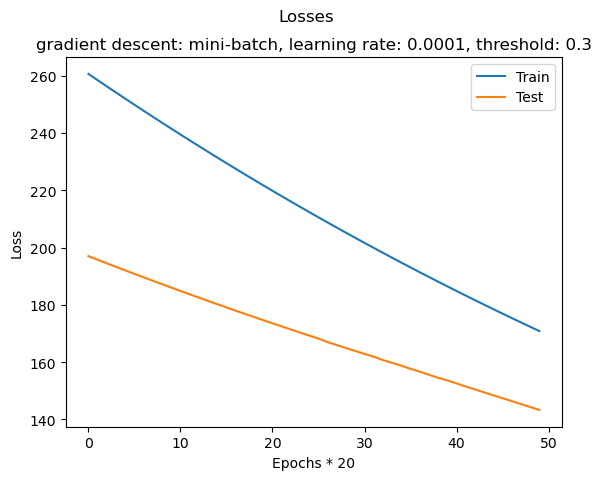

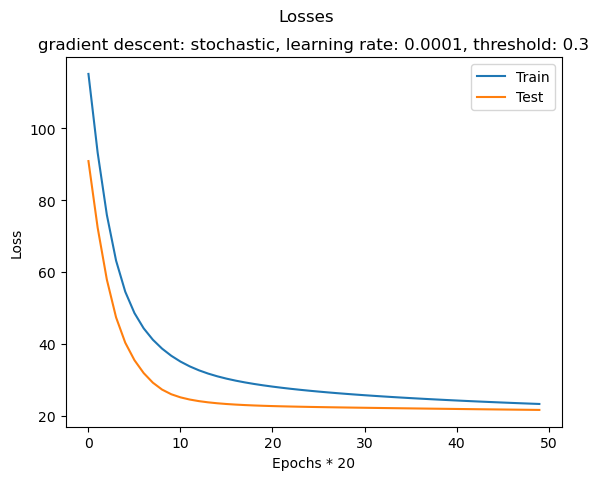

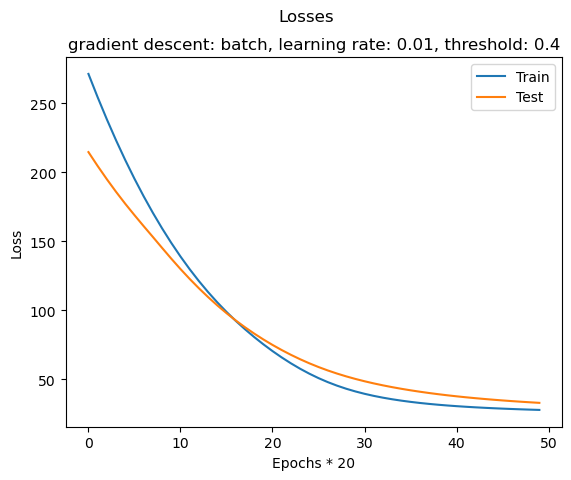

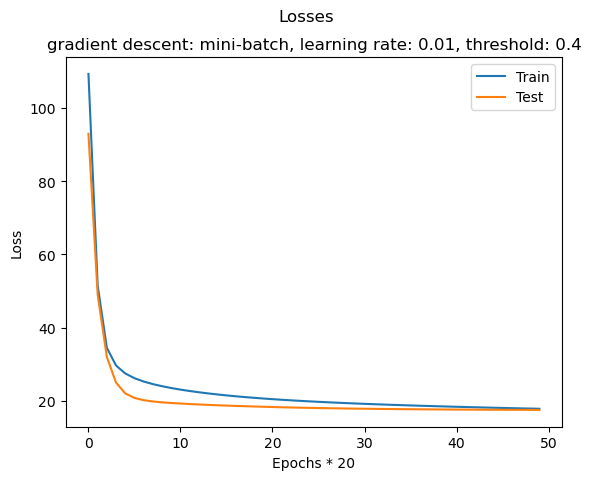

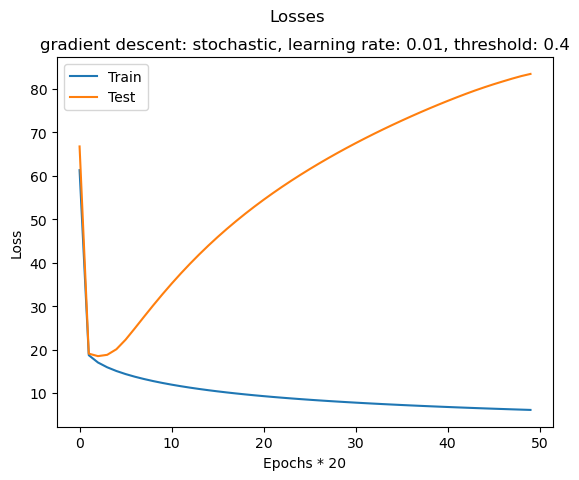

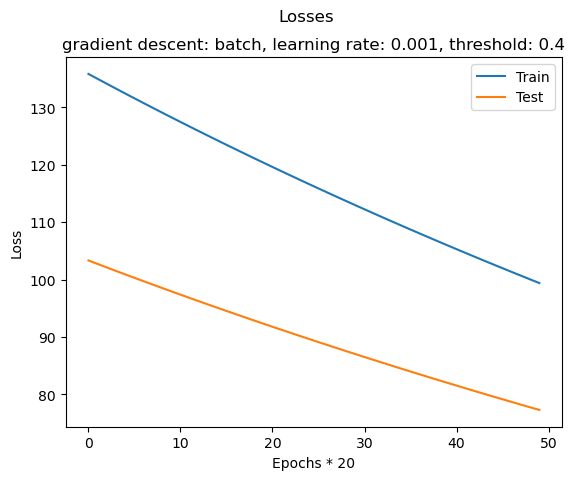

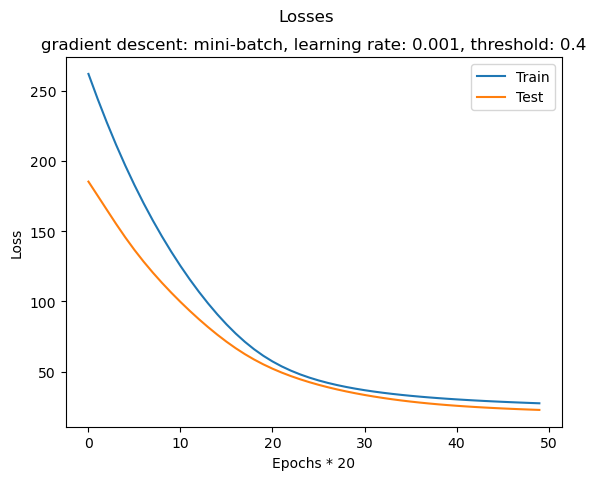

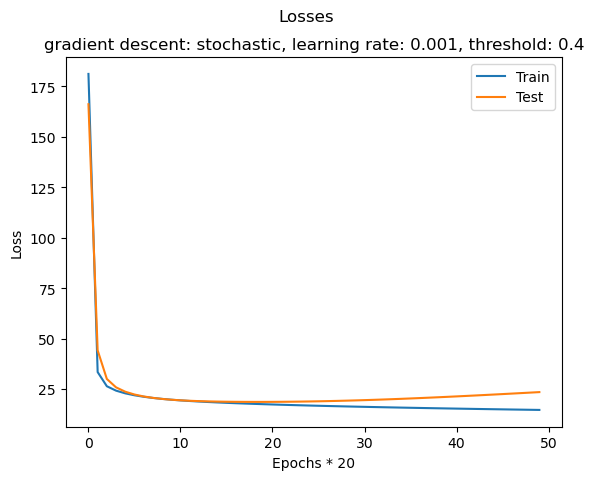

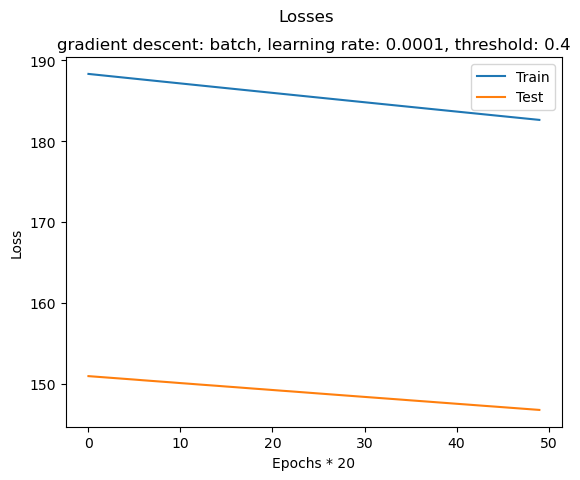

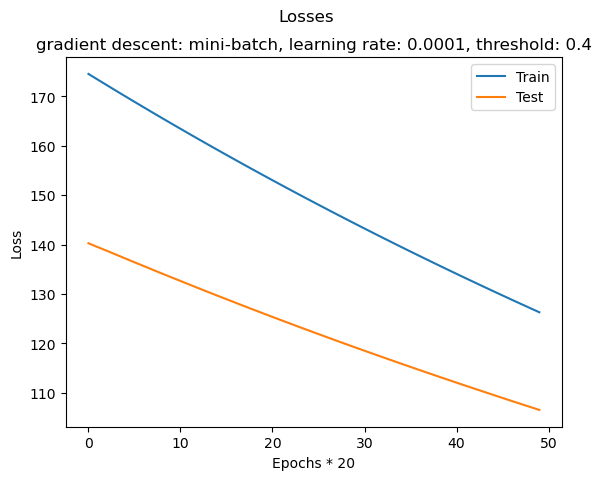

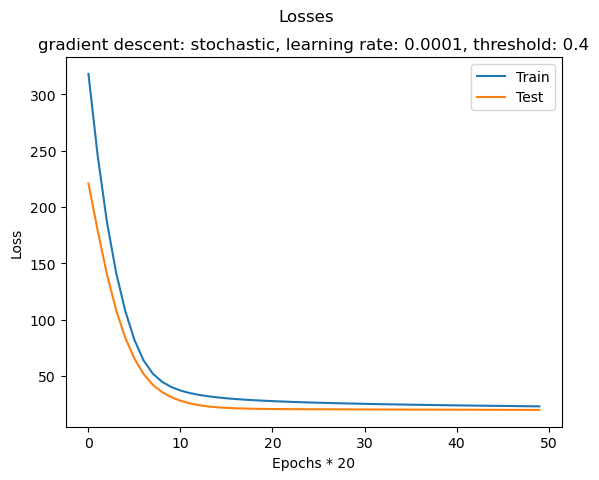

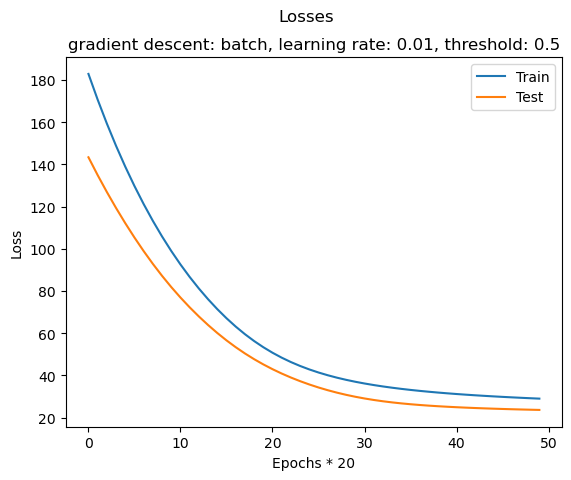

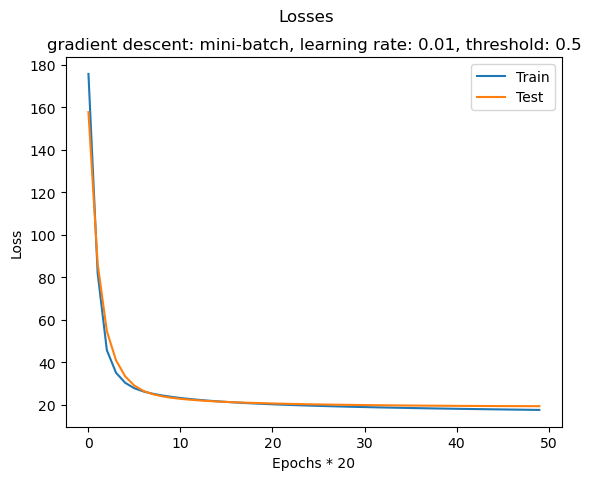

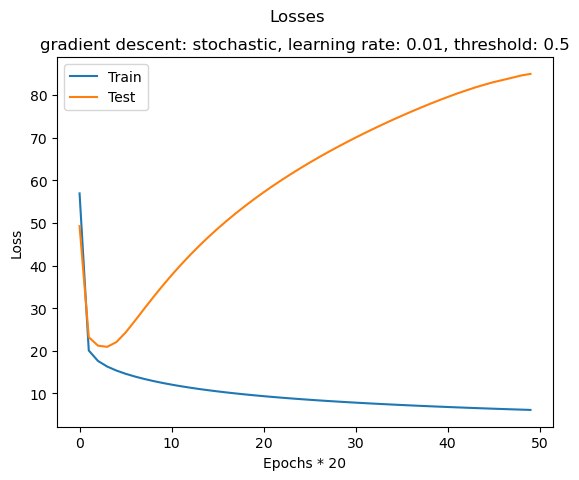

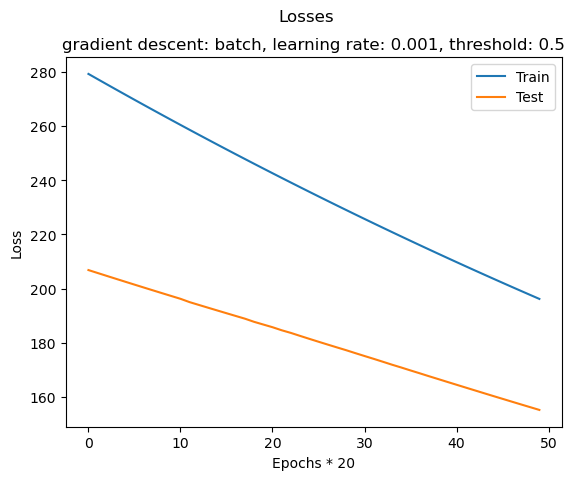

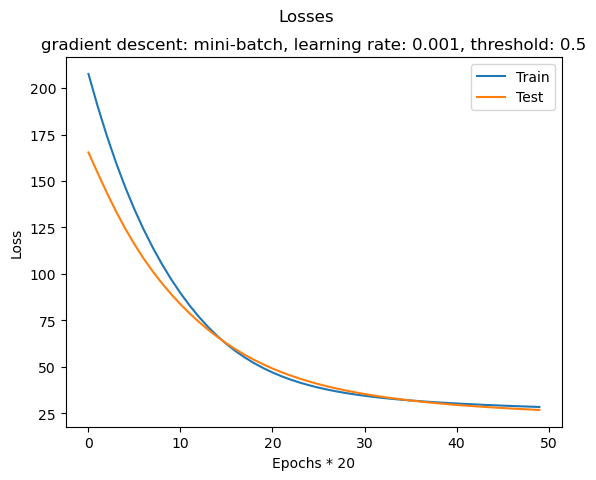

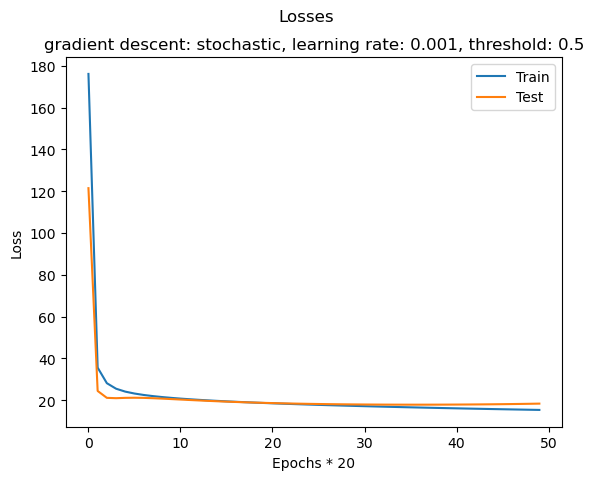

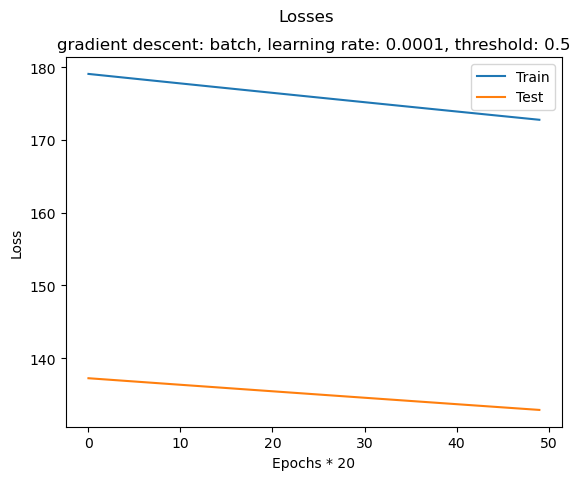

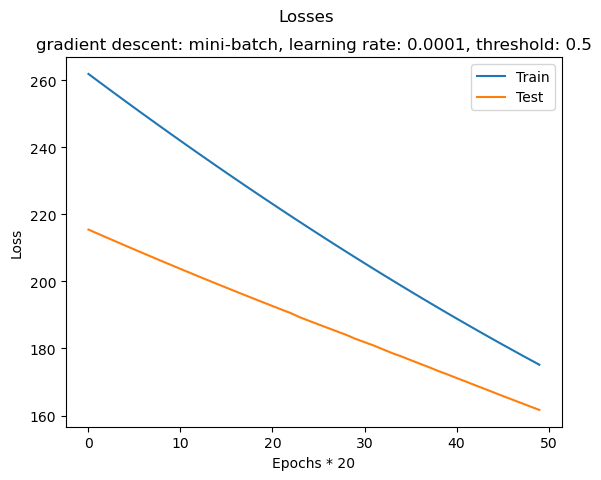

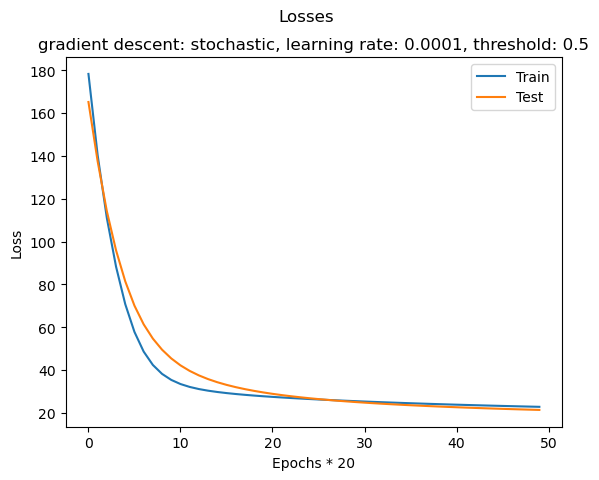

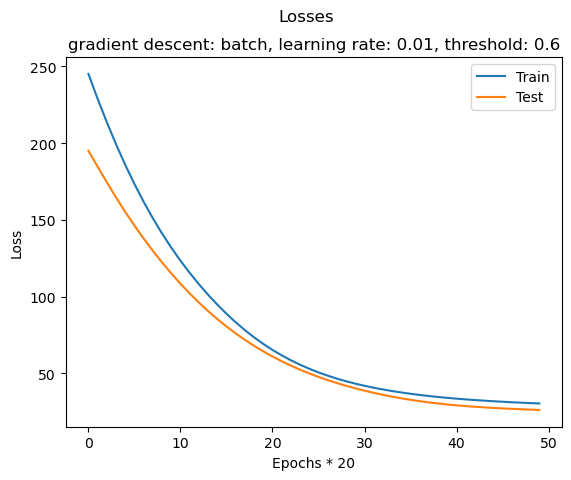

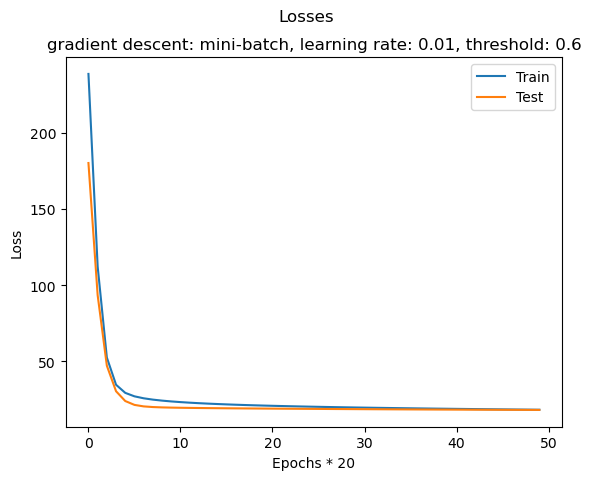

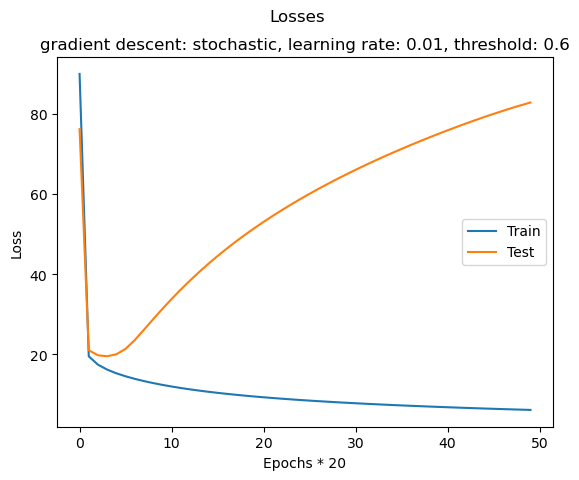

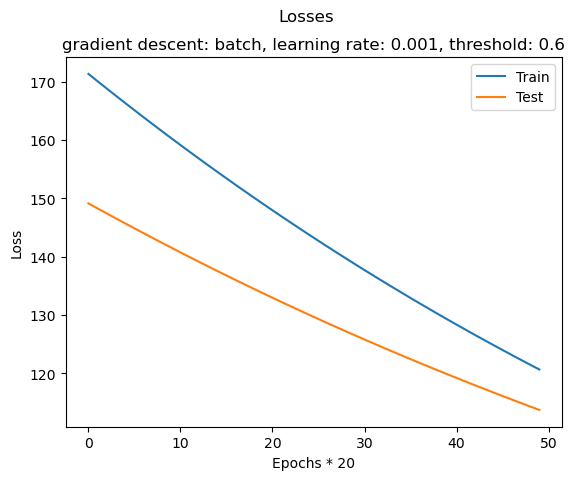

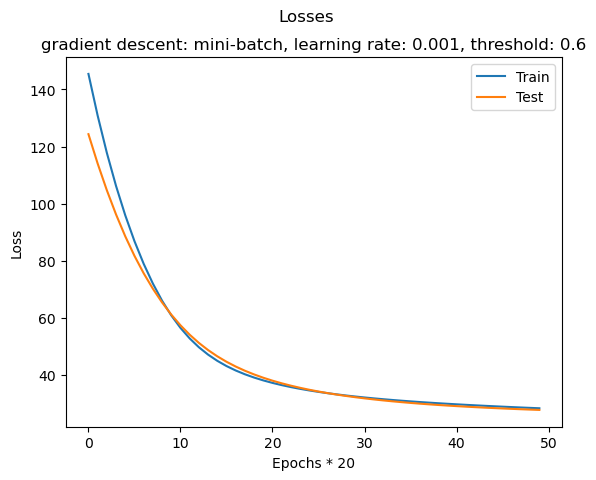

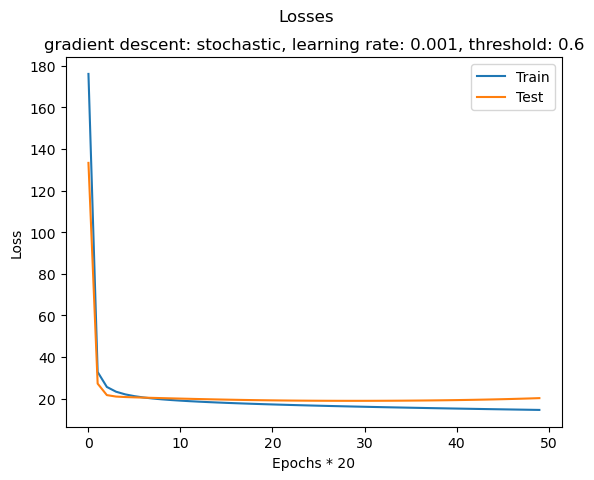

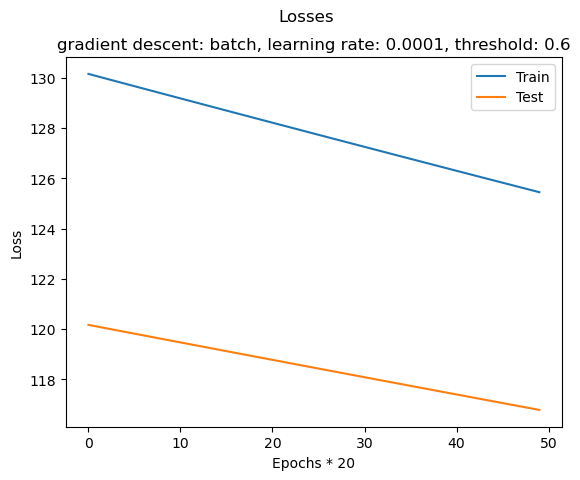

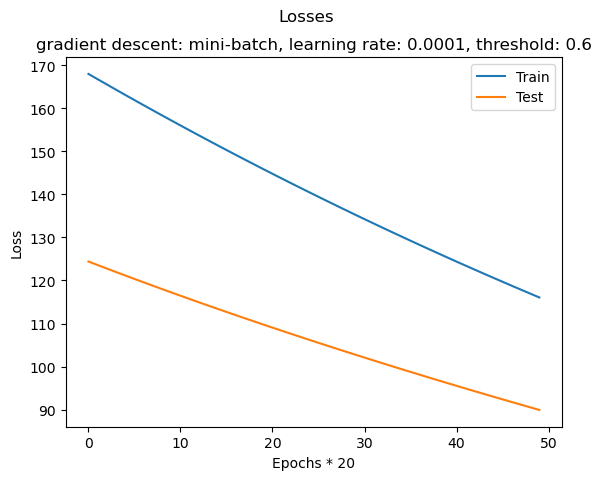

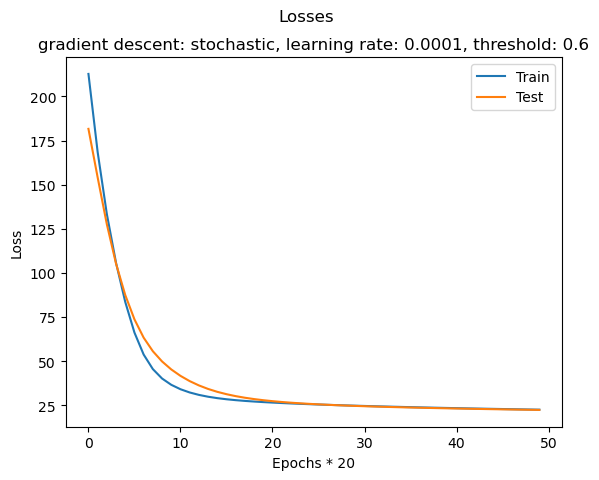

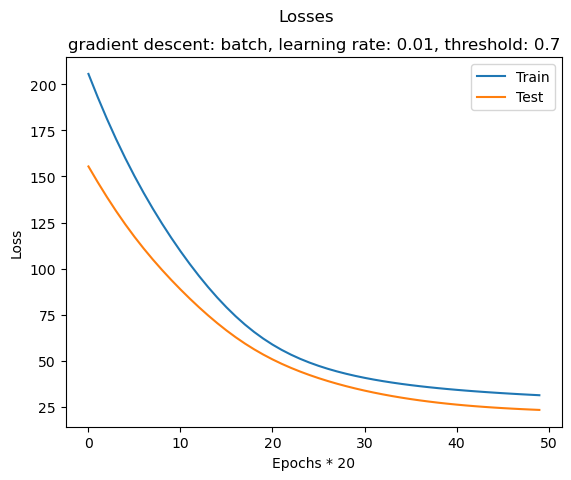

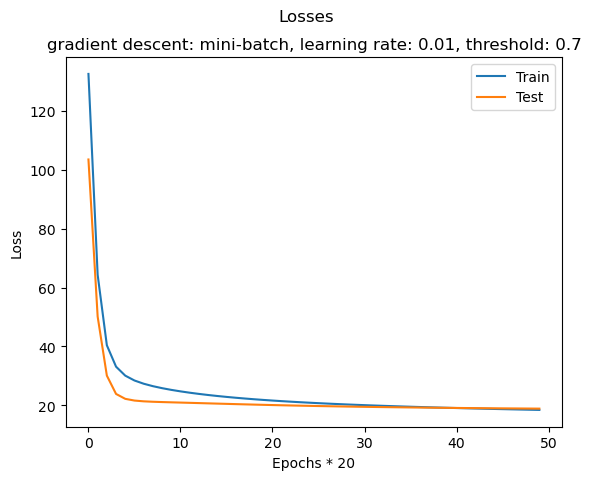

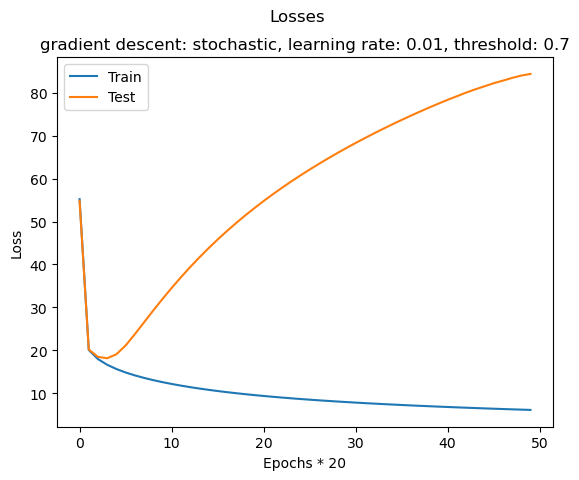

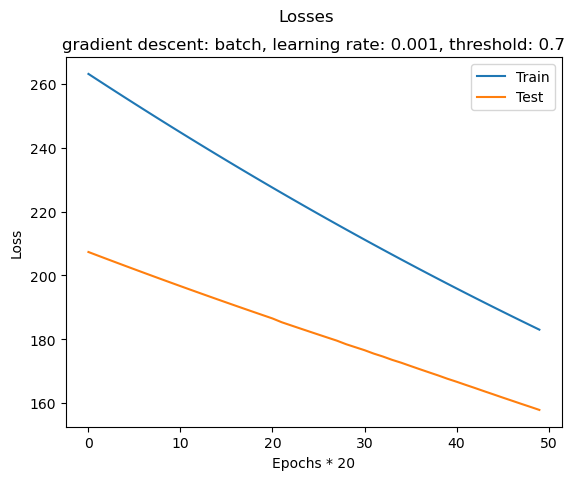

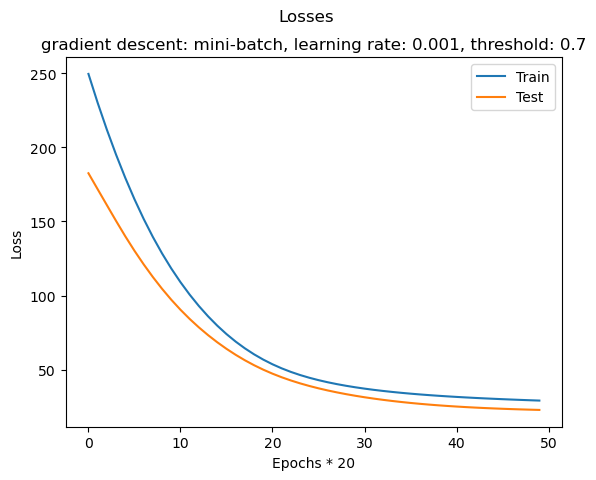

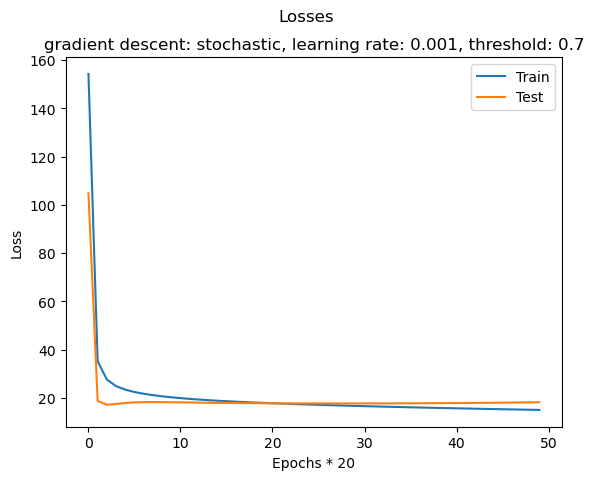

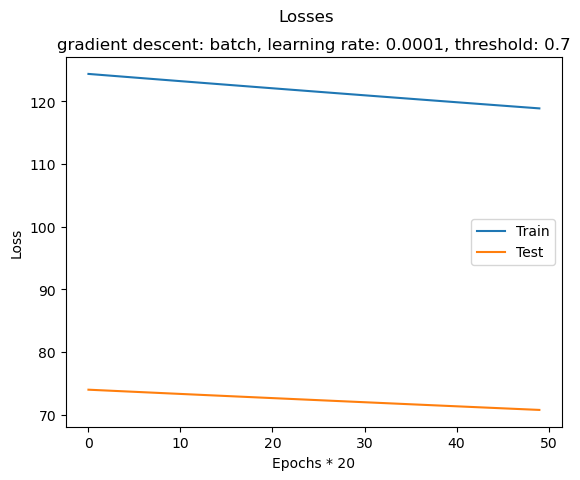

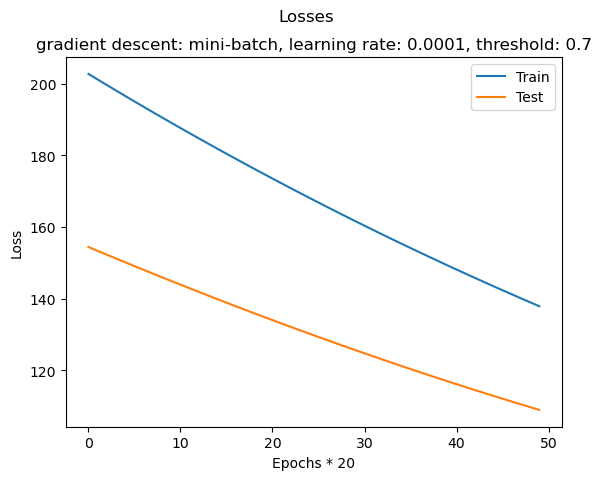

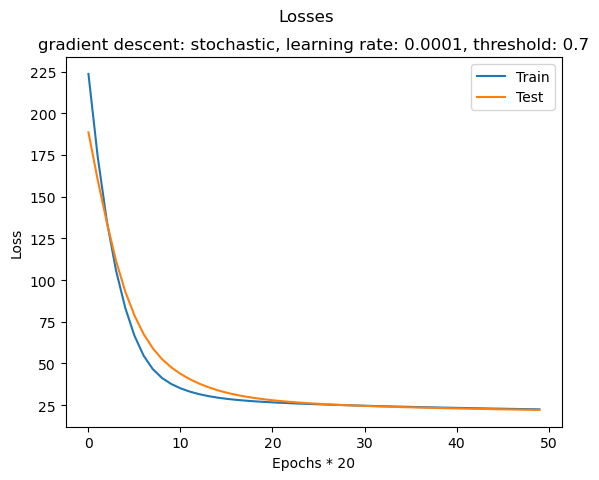

In [9]:
print("Learning Task2: Feature Engineering")
results_lr2 = results.copy()
for key in grid.keys():
    threshold, learning_rate, descent = key
    accuracies: list[float] = []
    for split in splits:
        train, test = split
        X_train, y_train = train.drop(columns=["diagnosis"]).to_numpy(dtype=np.float64), train["diagnosis"].to_numpy(dtype=np.float64)
        X_test, y_test = test.drop(columns=["diagnosis"]).to_numpy(dtype=np.float64), test["diagnosis"].to_numpy(dtype=np.float64)
        logreg_2 = LogReg(threshold=threshold)
        train_losses, test_losses = logreg_2.fit(X_train, y_train, X_test, y_test, lr = learning_rate, descent=descent, epochs=1000)
        y_pred = logreg_2.predict(X_test)
        tp, tn, fp, fn = logreg_2.score(X_test, y_test)
        accuracies.append((tp + tn) / (tp + tn + fp + fn))
    result_dict = {
        "threshold": threshold,
        "learning_rate": learning_rate,
        "descent": descent,
        "mean_accuracy": np.round((np.mean(accuracies)*100), 2),
        "std_accuracy": np.round((np.std(accuracies)*100), 2)
    }
    create_plot(train_losses, test_losses, f"gradient descent: {descent}, learning rate: {learning_rate}, threshold: {threshold}")
    result =  pd.DataFrame(result_dict, index=[0])
    results_lr2 = pd.concat([results_lr2, result], ignore_index=True)

In [10]:
results_lr2.sort_values(by="mean_accuracy", ascending=False, inplace=True)
results_lr2

threshold  learning_rate     descent  mean_accuracy  std_accuracy
1         0.3         0.0100  mini-batch          97.98           0.0
10        0.4         0.0100  mini-batch          97.98           0.0
26        0.5         0.0001  stochastic          96.97           0.0
19        0.5         0.0100  mini-batch          96.97           0.0
17        0.4         0.0001  stochastic          96.97           0.0
23        0.5         0.0010  stochastic          96.97           0.0
5         0.3         0.0010  stochastic          96.46           0.0
8         0.3         0.0001  stochastic          96.46           0.0
14        0.4         0.0010  stochastic          96.46           0.0
32        0.6         0.0010  stochastic          95.96           0.0
13        0.4         0.0010  mini-batch          95.45           0.0
20        0.5         0.0100  stochastic          95.45           0.0
28        0.6         0.0100  mini-batch          95.45           0.0
11        0.4         0.0100  stochastic          95.45           0.0
35        0.6         0.0001  stochastic          95.45           0.0
41        0.7         0.0010  stochastic          95.45           0.0
36        0.7         0.0100       batch          94.95           0.0
37        0.7         0.0100  mini-batch          94.95           0.0
18        0.5         0.0100       batch          94.95           0.0
4         0.3         0.0010  mini-batch          94.95           0.0
0         0.3         0.0100       batch          94.95           0.0
29        0.6         0.0100  stochastic          94.44           0.0
38        0.7         0.0100  stochastic          94.44           0.0
22        0.5         0.0010  mini-batch          94.44           0.0
44        0.7         0.0001  stochastic          94.44           0.0
2         0.3         0.0100  stochastic          93.94           0.0
27        0.6         0.0100       batch          93.94           0.0
40        0.7         0.0010  mini-batch          93.94           0.0
31        0.6         0.0010  mini-batch          93.43           0.0
9         0.4         0.0100       batch          93.43           0.0
34        0.6         0.0001  mini-batch          90.40           0.0
12        0.4         0.0010       batch          89.39           0.0
16        0.4         0.0001  mini-batch          89.39           0.0
43        0.7         0.0001  mini-batch          88.38           0.0
33        0.6         0.0001       batch          87.37           0.0
42        0.7         0.0001       batch          87.37           0.0
30        0.6         0.0010       batch          86.36           0.0
3         0.3         0.0010       batch          86.36           0.0
39        0.7         0.0010       batch          86.36           0.0
24        0.5         0.0001       batch          86.36           0.0
25        0.5         0.0001  mini-batch          85.86           0.0
15        0.4         0.0001       batch          85.86           0.0
21        0.5         0.0010       batch          84.85           0.0
7         0.3         0.0001  mini-batch          84.34           0.0
6         0.3         0.0001       batch          81.31           0.0

In [11]:
results_lr1.to_csv("results_lr1_1_split.csv", index=False)
results_lr2.to_csv("results_lr2_1_split.csv", index=False)